In [1]:
from google.colab import drive, files
import os
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Dataset Path Connection
dataset_path = "/content/drive/MyDrive/DICE/Dataset/Dataset/Train"
categories = ['0% Rotten', '25% Rotten', '50% Rotten', '75% Rotten', '100% Rotten']
image_size = (100, 100)

In [5]:
data, labels = [], []

#Cheacked Path
if not os.path.exists(dataset_path):
    raise ValueError(f"Dataset path not found: {dataset_path}")
else:
    print(f"Found dataset path: {dataset_path}")
    print("Subfolders:", os.listdir(dataset_path))

#Load Dataset
for idx, category in enumerate(categories):
    folder = os.path.join(dataset_path, category)
    if not os.path.exists(folder):
        print(f"Missing folder: {folder}")
        continue
    files_list = os.listdir(folder)
    print(f"{category}: Found {len(files_list)} files")

    for file in files_list:
        if file.startswith('.'): continue
        img_path = os.path.join(folder, file)
        try:
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            data.append(img_array)
            labels.append(idx)
        except Exception as e:
            print(f"Couldn't find any folder {img_path}: {e}")

if len(data) == 0:
    raise ValueError("No images loaded. Fix dataset path or contents.")
print(f"Total Loaded {len(data)} images.")

Found dataset path: /content/drive/MyDrive/DICE/Dataset/Dataset/Train
Subfolders: ['0% Rotten', '25% Rotten', '100% Rotten', '75% Rotten', '50% Rotten']
0% Rotten: Found 130 files
25% Rotten: Found 130 files
50% Rotten: Found 130 files
75% Rotten: Found 130 files
100% Rotten: Found 131 files
Total Loaded 651 images.


In [6]:
#Convert to Array
x = np.array(data)
y = to_categorical(labels, num_classes=5)

#Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Training images: {len(x_train)}")
print(f"Testing images: {len(x_test)}")

Training images: 455
Testing images: 196


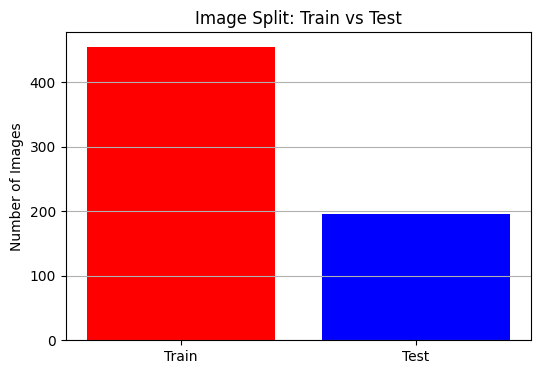

In [7]:
#Plot Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Test'], [len(x_train), len(x_test)], color=['red', 'blue'])
plt.title("Image Split: Train vs Test")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()

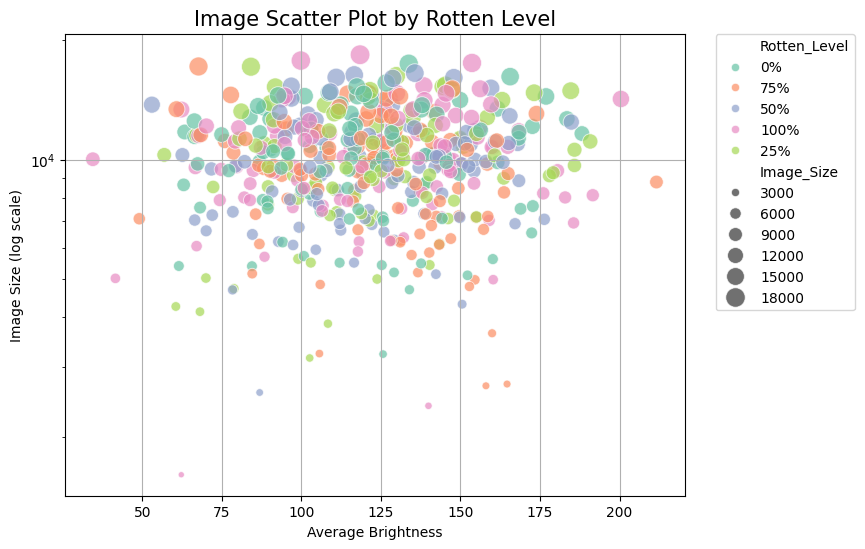

In [8]:
#Simulated image metadata
np.random_state=42
n = 500
df = pd.DataFrame({
    'Average_Brightness': np.random.normal(loc=120, scale=30, size=n),
    'Image_Size': np.random.normal(loc=10000, scale=3000, size=n),
    'Rotten_Level': np.random.choice(['0%', '25%', '50%', '75%', '100%'], size=n),
    'Image_ID': range(n)
})

#Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Average_Brightness',
    y='Image_Size',
    hue='Rotten_Level',
    size='Image_Size',
    sizes=(20, 200),
    alpha=0.7,
    palette='Set2'
)
plt.yscale('log')
plt.title("Image Scatter Plot by Rotten Level", fontsize=15)
plt.xlabel("Average Brightness")
plt.ylabel("Image Size (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

In [11]:
#CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Train the Model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.2351 - loss: 3.3223 - val_accuracy: 0.1786 - val_loss: 1.9326
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.3227 - loss: 1.5740 - val_accuracy: 0.4337 - val_loss: 1.3901
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.5998 - loss: 1.1343 - val_accuracy: 0.4541 - val_loss: 1.2494
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.6338 - loss: 0.9559 - val_accuracy: 0.4949 - val_loss: 1.2511
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.6991 - loss: 0.7683 - val_accuracy: 0.4643 - val_loss: 1.2906


In [13]:
#Upload an Image Predict
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving vertical_flip_Screen Shot 2018-06-07 at 2.33.47 PM.png to vertical_flip_Screen Shot 2018-06-07 at 2.33.47 PM.png


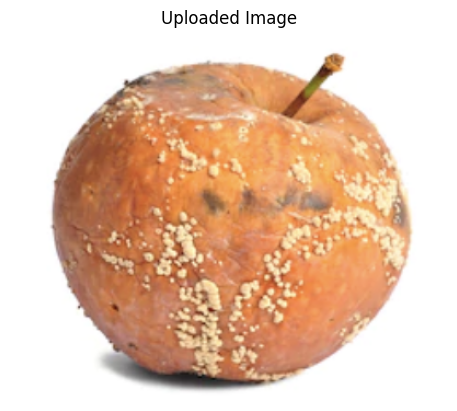

In [14]:
#Show Image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

#Predict Funcation
def predict_image(image_path):
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    return f"Prediction: {categories[class_index]}"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


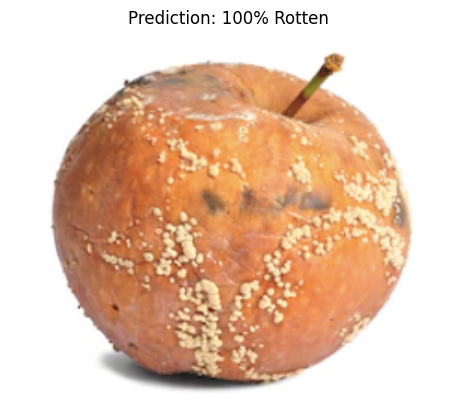

In [16]:
#Result
result = predict_image(img_path)

# Show IMage with Result Title
plt.imshow(img_rgb)
plt.title(result)
plt.axis("off")
plt.show()